<a href="https://colab.research.google.com/github/denizbaris/Data-with-Python/blob/main/AutoScout_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
import stat as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
import json

In [3]:
import dummy_threading

In [5]:
df=pd.read_json("/content/drive/MyDrive/scout_car.json", lines=True) #reading json  file from drive

In [6]:
df.to_csv(index=False) #converting jason datas to csv

In [8]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [9]:
df.tail()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,- km,-/-,None,NaN,147 kW,"[, New, , Diesel (Particulate Filter)]",NaN,NaN,NaN,\n24 months\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n10988301\n],NaN,"[\n, Grey, \n]",[\nMetallic\n],[\nGrigio scuro\n],NaN,"[\n, Van, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],"[\n1,758 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen]","[ABS, Central door lock, Central door lock wit...",[\nVettura visionabile nella sede in Via Roma ...,NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,"9,900 km",01/2019,1 previous owner,NaN,165 kW,"[, Used, , Super 95 / Super Plus 98 (Particula...","[\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...","[\n01/2022\n, \n168 g CO2/km (comb)\n]",NaN,"[\n, \n, \nEuro 6\n]",NaN,"[\n, \n, \n4 (Green)\n]",[],\nRenault\n,"[\n, Espace, \n]",[\n507370_3223\n],"[\n, 2019, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nStahl-Grau Metallic\n],[\nCloth\n],"[\n, Van, \n]",[\n5\n],[\n5\n],[\n0000/000\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,708 kg\n]",[\nfront\n],"[\n, Super 95 / Super Plus 98 (Particulate Fil...","[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...",[\n168 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen, Voice Control]","[ABS, Adaptive Cruise Control, Blind spot moni...","[\nDach: Panorama-Glas-Schiebedach, Lackierung...",NaN,[\n7\n],[\nGermany\n],NaN,NaN,"[[], [], []]",\nin 5 days from ordering\n,NaN,NaN
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15 km,03/2019,1 previous owner,NaN,146 kW,"[, Pre-registered, , Diesel]","[\n1\n, \n139 g CO2/km (comb)\n]",NaN,"[\nYes\n, \nEuro 6d-TEMP\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nRenault\n,"[\n, Espace, \n]",[\nEspace16\n],"[\n, 2019, \n]","[\n, White, \n]",NaN,[\narktis-weiß\n],"[\nFull leather, Black\n]","[\n, Van, \n]",[\n5\n],[\n7\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],[\nEuro 6d-TEMP\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Adaptive Cruise Control, Blind spot moni...","[\n, Getriebe:, Automatik, Technik:, Bordcom...",NaN,[\n6\n],[\nAustria\n],NaN,NaN,NaN,\nin 120 days from ordering\n,NaN,NaN
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700,VAT deductible,10 km,06/2019,None,NaN,147 kW,"[, Pre-registered, , Diesel]",NaN,NaN,NaN,\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n2691331\n],"[\n, 2019, \n]","[\n, Grey, \n]",NaN,[\nGrigio\n],[\nPart leather\n],"[\n, Van, \n]",[\n5\n

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [13]:
df.shape

(15919, 54)

In [14]:
df.dtypes

url                               object
make_model                        object
short_description                 object
body_type                         object
price                              int64
vat                               object
km                                object
registration                      object
prev_owner                        object
kW                               float64
hp                                object
Type                              object
Previous Owners                   object
Next Inspection                   object
Inspection new                    object
Warranty                          object
Full Service                      object
Non-smoking Vehicle               object
null                              object
Make                              object
Model                             object
Offer Number                      object
First Registration                object
Body Color                        object
Paint Type      

In [16]:
df.describe()

,price,kW
count,15919.000000,0.0
mean,18019.896727,NaN
std,7386.169409,NaN
min,13.000000,NaN
25%,12850.000000,NaN
50%,16900.000000,NaN
75%,21900.000000,NaN
max,74600.000000,NaN


In [17]:
df.describe(include= 'O')

,url,make_model,short_description,body_type,vat,km,registration,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
count,15919,15919,15873,15859,11406,15919,15919,9091,15919,15917,9279,3535,3932,10499,8215,7177,15919,15919,15919,12744,14322,15322,10147,12160,12199,15859,15707,14942,4978,15919,15423,10239,8945,9061,15919,14013,14111,12898,14999,14545,12957,14937,15919,3985,11207,7586,137,566,880,635,16,272
unique,15919,9,10001,9,2,6690,48,4,81,169,102,1399,202,515,122,94,1,3,9,11440,4,14,3,1927,46,9,6,6,232,3,77,7,434,3,77,881,123,7,6198,346,659,4443,12874,6,10,23,1,266,1,15,15,46
top,https://www.autoscout24.com//offers/opel-insig...,Audi A3,SPB 1.6 TDI 116 CV S tronic Sport,Sedans,VAT deductible,10 km,-/-,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,\n04/2022\n,"[\nYes\n, \nEuro 6\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[],\nOpel\n,"[\n, A3, \n]",[\nTA76392\n],"[\n, 2018, \n]","[\n, Black, \n]",[\nMetallic\n],[\nOnyx Schwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0035/BCB\n],"[\n, Manual, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,163 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.9 l/100 km (comb)], [4.1 l/100 km (city)],...",[\n120 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Electrical side mirrors, Hi...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Central door lock, Daytime running light...",[],[\n4 (Green)\n],[\n6\n],[\nGermany\n],[\n0 kWh/100 km (comb)\n],"[\n02/2019\n, \nEuro 6\n]","[[], [], []]",\nin 90 days from ordering\n,[\n04/2016\n],\n31/08/19\n
freq,1,3097,64,7903,10980,1045,1597,8294,2542,3475,8101,62,523,1868,2235,3647,15919,7343,3097,27,4522,3745,9794,338,5821,7903,11575,13336,268,8153,4761,8105,574,8886,4315,304,740,10139,216,1282,3245,538,636,3553,5822,4502,137,23,880,196,2,98


In [18]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['price' 'kW']


In [19]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values 
print(non_numeric_cols)

['url' 'make_model' 'short_description' 'body_type' 'vat' 'km'
 'registration' 'prev_owner' 'hp' 'Type' 'Previous Owners'
 'Next Inspection' 'Inspection new' 'Warranty' 'Full Service'
 'Non-smoking Vehicle' 'null' 'Make' 'Model' 'Offer Number'
 'First Registration' 'Body Color' 'Paint Type' 'Body Color Original'
 'Upholstery' 'Body' 'Nr. of Doors' 'Nr. of Seats' 'Model Code'
 'Gearing Type' 'Displacement' 'Cylinders' 'Weight' 'Drive chain' 'Fuel'
 'Consumption' 'CO2 Emission' 'Emission Class' '\nComfort & Convenience\n'
 '\nEntertainment & Media\n' '\nExtras\n' '\nSafety & Security\n'
 'description' 'Emission Label' 'Gears' 'Country version'
 'Electricity consumption' 'Last Service Date' 'Other Fuel Types'
 'Availability' 'Last Timing Belt Service Date' 'Available from']


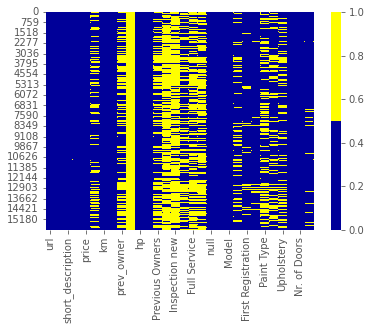

In [20]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [21]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

url - 0%
make_model - 0%
short_description - 0%
body_type - 0%
price - 0%
vat - 28%
km - 0%
registration - 0%
prev_owner - 43%
kW - 100%
hp - 0%
Type - 0%
Previous Owners - 42%
Next Inspection - 78%
Inspection new - 75%
Warranty - 34%
Full Service - 48%
Non-smoking Vehicle - 55%
null - 0%
Make - 0%
Model - 0%
Offer Number - 20%
First Registration - 10%
Body Color - 4%
Paint Type - 36%
Body Color Original - 24%
Upholstery - 23%
Body - 0%
Nr. of Doors - 1%
Nr. of Seats - 6%
Model Code - 69%
Gearing Type - 0%
Displacement - 3%
Cylinders - 36%
Weight - 44%
Drive chain - 43%
Fuel - 0%
Consumption - 12%
CO2 Emission - 11%
Emission Class - 19%

Comfort & Convenience
 - 6%

Entertainment & Media
 - 9%

Extras
 - 19%

Safety & Security
 - 6%
description - 0%
Emission Label - 75%
Gears - 30%
Country version - 52%
Electricity consumption - 99%
Last Service Date - 96%
Other Fuel Types - 94%
Availability - 96%
Last Timing Belt Service Date - 100%
Available from - 98%


created missing indicator for: short_description
created missing indicator for: body_type
created missing indicator for: vat
created missing indicator for: prev_owner
created missing indicator for: kW
created missing indicator for: Type
created missing indicator for: Previous Owners
created missing indicator for: Next Inspection
created missing indicator for: Inspection new
created missing indicator for: Warranty
created missing indicator for: Full Service
created missing indicator for: Non-smoking Vehicle
created missing indicator for: Offer Number
created missing indicator for: First Registration
created missing indicator for: Body Color
created missing indicator for: Paint Type
created missing indicator for: Body Color Original
created missing indicator for: Upholstery
created missing indicator for: Body
created missing indicator for: Nr. of Doors
created missing indicator for: Nr. of Seats
created missing indicator for: Model Code
created missing indicator for: Displacement
created

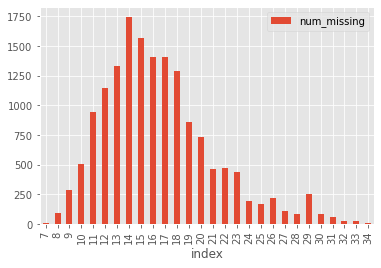

In [22]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

plt.show()